In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

In [5]:
# drop everything but Q1 and Q5
df = df[['Q1', 'Q5']]

# RELEVANT DATA

In [6]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object

In [7]:
df['Q5']

0      We should develop more powerful and more gener...
1                      Soon, but not as fast as possible
2                              Eventually, but not soon.
3                              We should never build AGI
4                              Eventually, but not soon.
                             ...                        
101                                                  NaN
102                            Eventually, but not soon.
103    We should develop more powerful and more gener...
104                                                  NaN
105                            Eventually, but not soon.
Name: Q5, Length: 106, dtype: object

In [8]:
df['Q1'].value_counts()

Academic                57
Industry                14
AI Safety Researcher     8
Other                    7
Name: Q1, dtype: int64

In [9]:
df['Q5'].value_counts()

Eventually, but not soon.                                                       37
Soon, but not as fast as possible                                               24
We should develop more powerful and more general systems as fast as possible    20
We should never build AGI                                                        6
Name: Q5, dtype: int64

In [10]:
timelines_positions = {
    "Eventually, but not soon.": "Eventually",
    "Soon, but not as fast as possible": "Soon",
    "We should develop more powerful and more general systems as fast as possible": "ASAP",
    "We should never build AGI": "Never"
}

# replace the values in the column
df['Q5'] = df['Q5'].replace(timelines_positions)

In [11]:
q5 = df['Q5'].dropna()
q1 = df['Q1'].dropna()

In [12]:
q5.value_counts()

Eventually    37
Soon          24
ASAP          20
Never          6
Name: Q5, dtype: int64

# WHEN SHOULD AGI be DEVELOPED PLOT

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume df is your DataFrame with Q1 and Q5 columns

# Create figure and axis objects

# Get unique values and counts
q5_counts = q5.value_counts()
q1_groups = q1.unique()


In [14]:
q5_counts

Eventually    37
Soon          24
ASAP          20
Never          6
Name: Q5, dtype: int64

In [15]:

# Calculate percentages
q5_percentages = q5_counts / len(df) * 100



In [16]:
q5_percentages

Eventually    34.905660
Soon          22.641509
ASAP          18.867925
Never          5.660377
Name: Q5, dtype: float64

In [17]:
new_order = ['ASAP', 'Soon', 'Eventually', 'Never']
q5_counts = q5.value_counts().reindex(new_order)
q5_percentages = (q5_counts / len(q5) * 100).reindex(new_order)



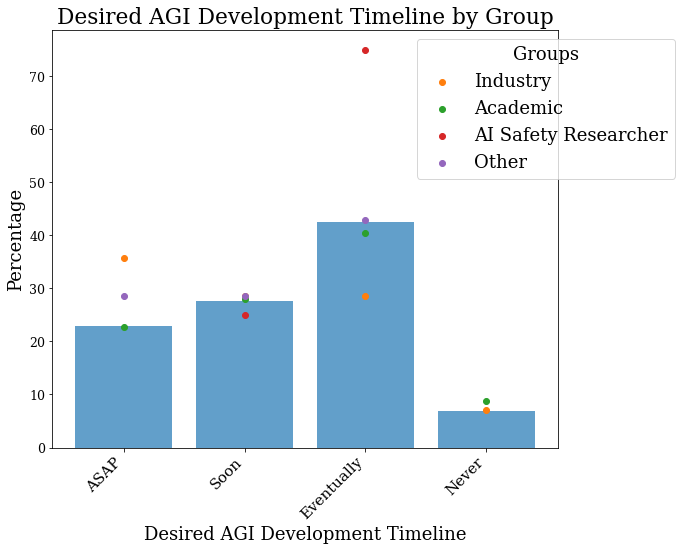

In [27]:


fig, ax = plt.subplots(figsize=(10, 8))

# Plot overall bars
bars = ax.bar(q5_counts.index, q5_percentages, alpha=0.7)

# Plot group-specific dots
for i, group in enumerate(q1_groups):
    group_data = df[df['Q1'] == group]
    group_percentages = (group_data['Q5'].value_counts() / len(group_data) * 100).reindex(new_order)
    ax.scatter(group_percentages.index, group_percentages, 
               label=group, zorder=3)

# Customize the plot
ax.set_ylabel('Percentage')
ax.set_xlabel('Desired AGI Development Timeline')
ax.set_title('Desired AGI Development Timeline by Group')
ax.legend(title='Groups', loc='upper right', bbox_to_anchor=(1.25, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=15)
# Adjust layout and save
plt.tight_layout()
plt.savefig('figs/agi_timelines_2.pdf', format='pdf')
# plt.close()
plt.show()

In [19]:
q5 = df['Q5'].dropna()

In [20]:
q5.value_counts()

Eventually    37
Soon          24
ASAP          20
Never          6
Name: Q5, dtype: int64